In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [18]:
data = pd.read_csv('Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
real_X = data.iloc[:,2:4].values
real_Y = data.iloc[:,4].values

In [20]:
train_X,test_X,train_Y,test_Y = train_test_split(real_X,real_Y,test_size=0.25,random_state=0)

In [21]:
standardScaler = StandardScaler()

In [22]:
train_X = standardScaler.fit_transform(train_X)

In [23]:
test_X = standardScaler.fit_transform(test_X)

In [24]:
svc = SVC(kernel='linear',random_state=0)

In [25]:
svc.fit(train_X,train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
pred_Y = svc.predict(test_X)

In [27]:
pred_Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [28]:
test_Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [29]:
confusionMatrix=confusion_matrix(y_true=test_Y,y_pred=pred_Y)

In [30]:
confusionMatrix

array([[63,  5],
       [ 7, 25]], dtype=int64)

C:\Users\Darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'aplha'
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


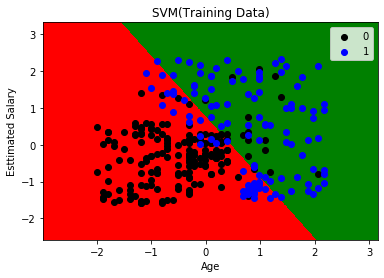

In [33]:
set_X,set_Y = train_X,train_Y
X1,X2 = np.meshgrid(np.arange(start = set_X[:,0].min()-1, stop = set_X[:,0].max()+1,step=0.01),
                    np.arange(start = set_X[:,1].min()-1, stop = set_X[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             aplha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(set_Y)):
    plt.scatter(set_X[set_Y == j ,0],set_X[set_Y == j ,1],
               c=ListedColormap(('black','blue'))(i),label=j)
plt.title('SVM(Training Data)')
plt.xlabel('Age')
plt.ylabel('Esttimated Salary')
plt.legend()
plt.show()

C:\Users\Darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'aplha'
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


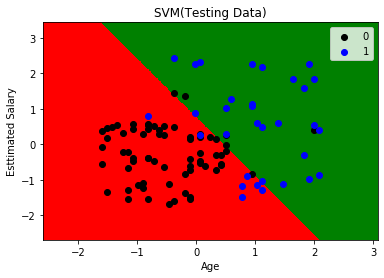

In [34]:
set_X,set_Y = test_X,test_Y
X1,X2 = np.meshgrid(np.arange(start = set_X[:,0].min()-1, stop = set_X[:,0].max()+1,step=0.01),
                    np.arange(start = set_X[:,1].min()-1, stop = set_X[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             aplha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(set_Y)):
    plt.scatter(set_X[set_Y == j ,0],set_X[set_Y == j ,1],
               c=ListedColormap(('black','blue'))(i),label=j)
plt.title('SVM(Testing Data)')
plt.xlabel('Age')
plt.ylabel('Esttimated Salary')
plt.legend()
plt.show()